In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import glob
import regex as re
import scipy.io as sio

TypeError: Image data of dtype <U48 cannot be converted to float

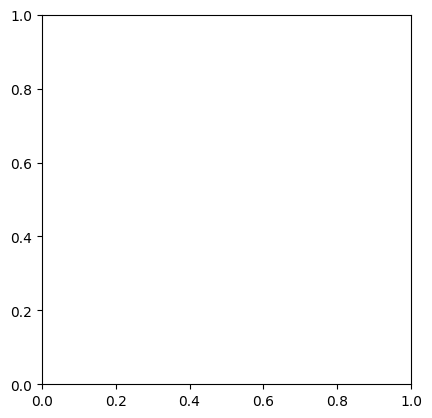

In [5]:
PATHNAME = "C:\\tractography"
connectivity_files = glob.glob(os.path.join(PATHNAME, "*.csv"))

# Load the connectivity files
connectivity_data = []
for file in connectivity_files:
    connectivity_data.append(np.loadtxt(file, delimiter=","))

print(connectivity_data[0])
# Matplob lib it 
for i, file in enumerate(connectivity_files):
    plt.figure()
    plt.imshow(file)

### **DSI Studio**

In [51]:
# Define the path
PATH_NAME = os.path.join(os.getcwd(), "data/dsi_outputs/studio")
# "C:\tractography\data\dsi_outputs\studio\CC310463\CC310463_qsdr.fib.gz.tt.gz.aal116_mni.count.end.connectivity.mat"
# Create list of all connectivities
INPUT_FILES = []
files = os.listdir(PATH_NAME)
for file in glob.glob(os.path.join(PATH_NAME, os.path.join("**", "*.mat")), recursive=True):
    INPUT_FILES.append(file)
# Create dictionary of connectivities
DETERMINISTIC_CONNECTIVITIES = {}
for file in INPUT_FILES:
    # Get the folder name
    folder_name = file.split("/")[-1].split("_")[0]
    atlas_name = file.split(".")[-5].split("_")[-2]
    # Get the connectivity matrix
    connectivity_matrix = np.array(sio.loadmat(file)["connectivity"])
    # Append folder, atlas and connectivity matrix to dictionary
    DETERMINISTIC_CONNECTIVITIES[folder_name] = {atlas_name: connectivity_matrix} | DETERMINISTIC_CONNECTIVITIES.get(folder_name, {})

dict_keys(['CC220352', 'CC621284', 'CC310463', 'CC620659'])


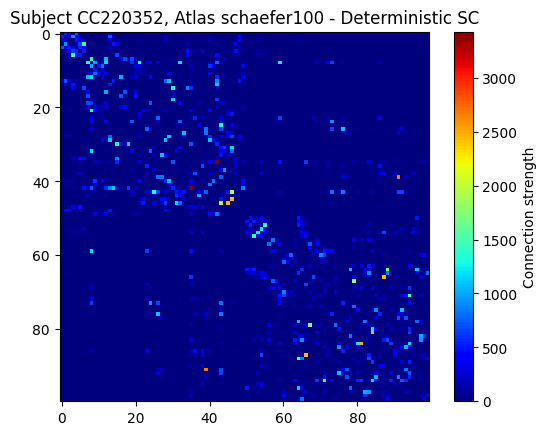

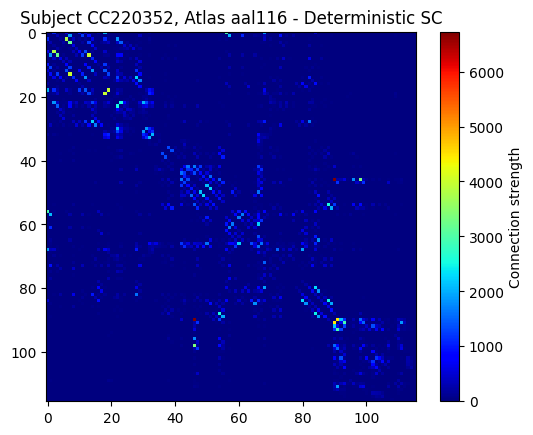

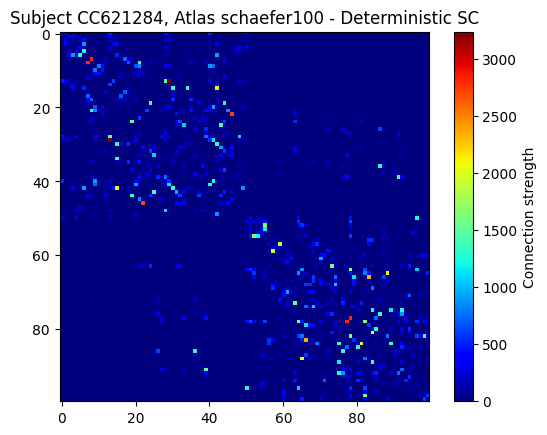

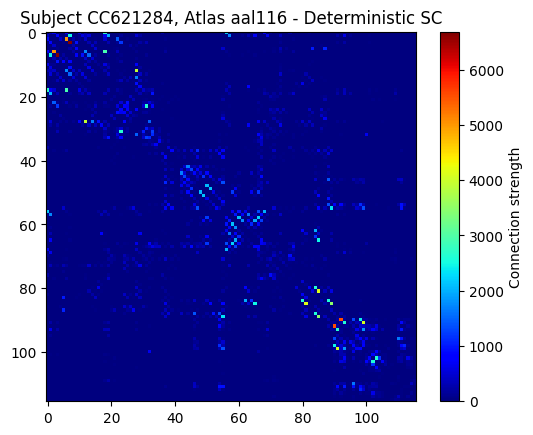

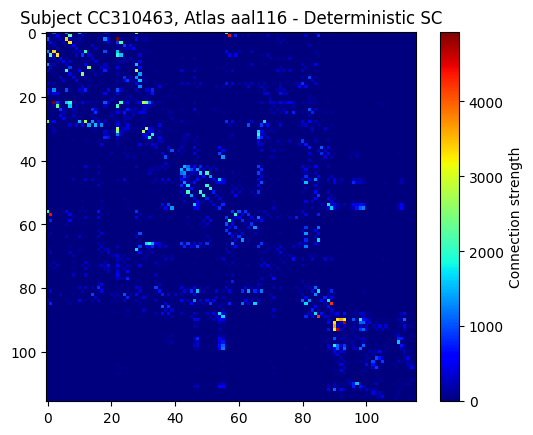

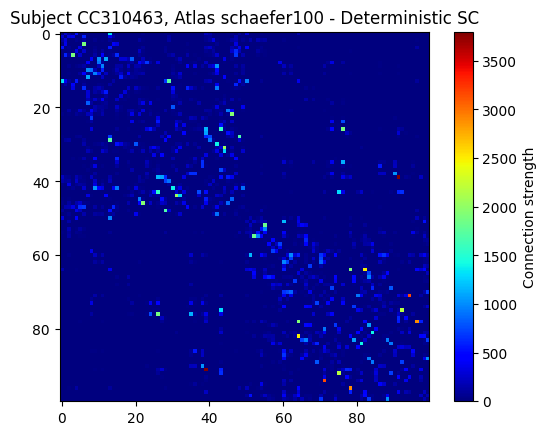

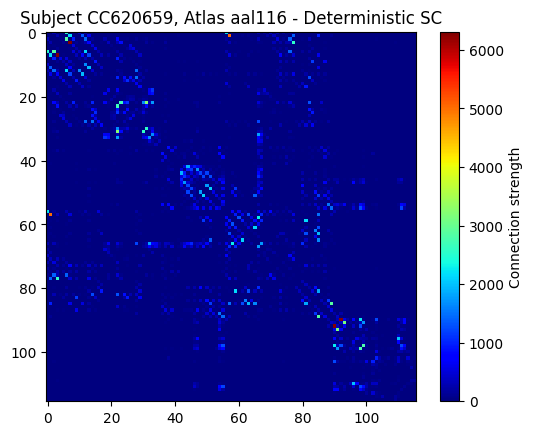

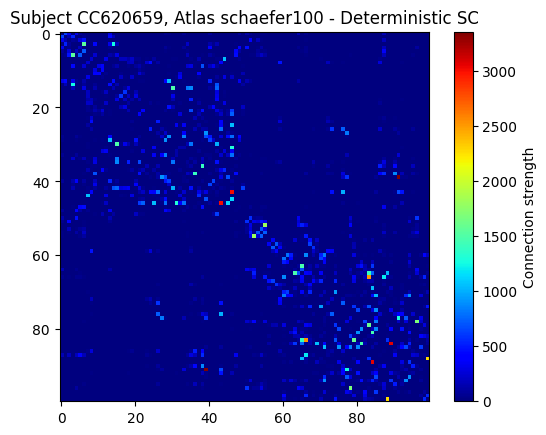

In [53]:
# For every subject
for subject, atlases in DETERMINISTIC_CONNECTIVITIES.items():
    # Create connectivities folder per subject
    folder_name = os.path.join(os.getcwd(), "data/dsi_outputs/studio/{}/connectivity".format(subject))
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # For each subject's atlas
    for atlas, values in atlases.items():
        plt.figure()
        plt.imshow(values, cmap='jet', aspect='equal', interpolation='nearest')
        cb = plt.colorbar()
        cb.set_label('Connection strength')
        title = "Subject " + subject + ", Atlas " + atlas + " - Deterministic SC"
        plt.title(title)
        plt.savefig(os.path.join(folder_name, atlas + "_deterministic.png"))
        # Save to csv
        np.savetxt(os.path.join(folder_name, atlas + "_deterministic.csv"), values, delimiter=",")


### **MRTrix**

In [54]:
# Define the path
PATH_NAME = os.path.join(os.getcwd(), "data/dsi_outputs/mrtrix")
# Create list of all connectivities
INPUT_FILES = []
for file in glob.glob(os.path.join(PATH_NAME, os.path.join("**", "*.csv")), recursive=True):
    INPUT_FILES.append(file)
# Create dictionary of probabilistic and global connectivities
PROB_CONNECTIVITIES = {}
GLOBAL_CONNECTIVITIES = {}
for file in INPUT_FILES:
    # Get the folder name
    folder_name = file.split(".")[-2].split("/")[:-1]
    folder_name = '/'.join(folder_name)
    if "prob" in file:
        PROB_CONNECTIVITIES[file.split("/")[-1].split(".")[0].split("_")[0]] = [folder_name, np.genfromtxt(file, delimiter=',')]
    else:
        GLOBAL_CONNECTIVITIES[file.split("/")[-1].split(".")[0].split("_")[0]] = [folder_name, np.genfromtxt(file, delimiter=',')]

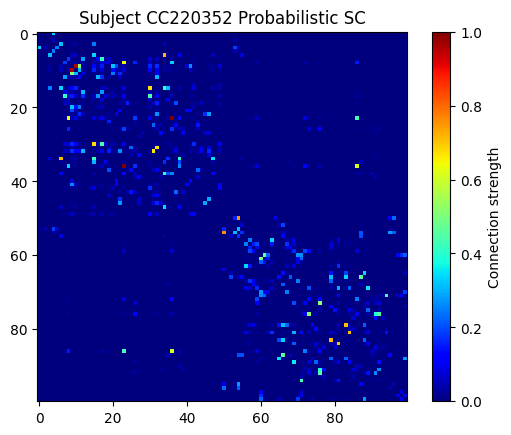

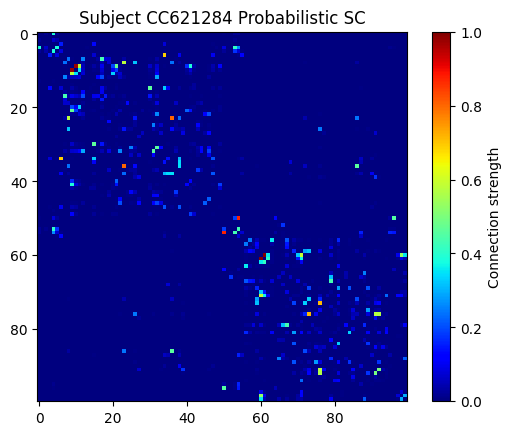

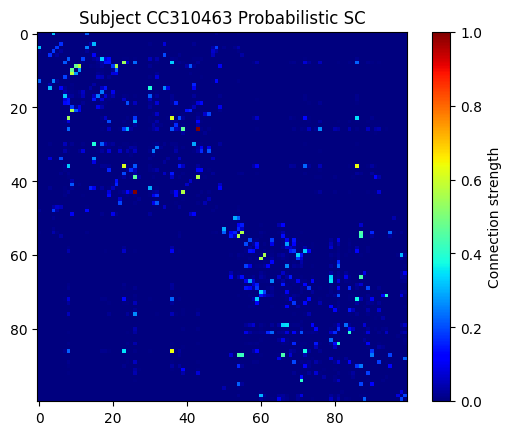

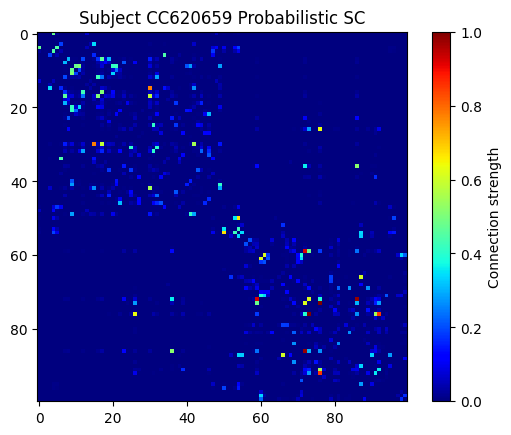

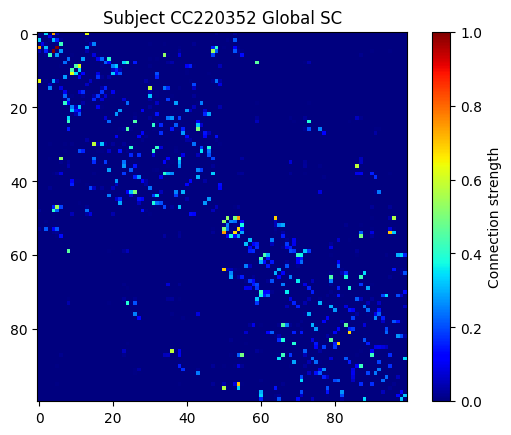

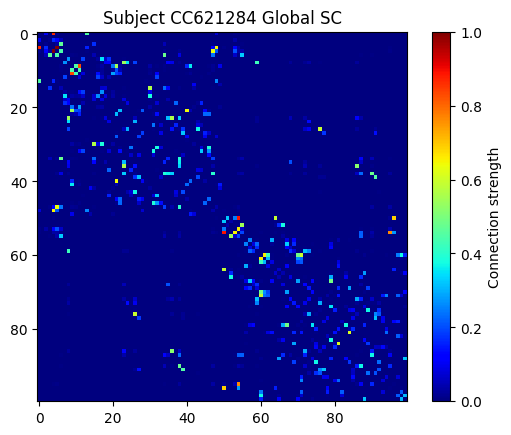

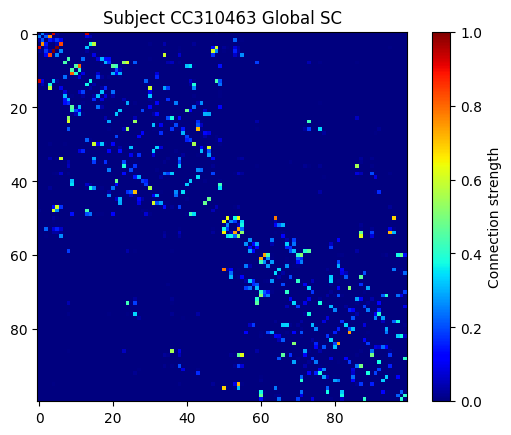

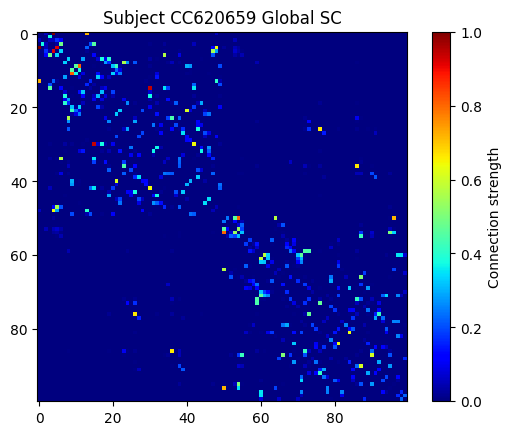

In [55]:
# For every one of the connectivities, plot them
for key, value in PROB_CONNECTIVITIES.items():
    plt.figure()
    value_norm = (value[1]-value[1].min())/(value[1].max()-value[1].min())
    plt.imshow(value_norm, cmap='jet', aspect='equal', interpolation='nearest')
    # plt.imshow(value[1], cmap='jet', aspect='equal', interpolation='nearest', extent=[0, 1, 0, 1])
    cb = plt.colorbar()
    cb.set_label('Connection strength')
    title = "Subject " + key + " - Probabilistic SC"
    plt.title(title)
    plt.savefig(os.path.join(value[0], title + ".png"))

for key, value in GLOBAL_CONNECTIVITIES.items():
    plt.figure()
    value_norm = (value[1]-value[1].min())/(value[1].max()-value[1].min())
    plt.imshow(value_norm, cmap='jet', aspect='equal', interpolation='nearest')
    # plt.imshow(value[1], cmap='jet', aspect='equal', interpolation='nearest', extent=[0, 1, 0, 1])
    cb = plt.colorbar()
    cb.set_label('Connection strength')
    title = "Subject " + key + " - Global SC"
    plt.title(title)
    plt.savefig(os.path.join(value[0], title + ".png"))
